In [119]:
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install pandas

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Show Data

In [28]:
last = pd.read_csv('data_last.csv')
last.head()

,ticker,date,last
0,1332 JT,2017-08-16,562.12
1,1332 JT,2017-08-17,560.36
2,1332 JT,2017-08-18,553.32
3,1332 JT,2017-08-21,544.53
4,1332 JT,2017-08-22,535.73


In [29]:
mkt_cap = pd.read_csv('data_mkt_cap.csv')
mkt_cap.head()

,ticker,date,mkt_cap
0,1332 JT,2017-08-16,199642.95
1,1332 JT,2017-08-17,199018.09
2,1332 JT,2017-08-18,196518.64
3,1332 JT,2017-08-21,193394.34
4,1332 JT,2017-08-22,190270.04


In [30]:
sector = pd.read_csv('data_sector.csv')
sector.head()

,ticker,bics_sector
0,1332 JT,"Consumer, Non-cyclical"
1,1333 JT,"Consumer, Non-cyclical"
2,1334 JT,"Consumer, Non-cyclical"
3,1605 JT,Energy
4,1721 JT,Industrial


In [31]:
volume = pd.read_csv('data_volume.csv')
volume.head()

,ticker,date,volume
0,1332 JT,2017-08-16,1641300.0
1,1332 JT,2017-08-17,1247700.0
2,1332 JT,2017-08-18,1505800.0
3,1332 JT,2017-08-21,2046200.0
4,1332 JT,2017-08-22,2409300.0


## compose a stock index using market cap weight, set it to 1000 point on 2020-01-06, and make a line plot

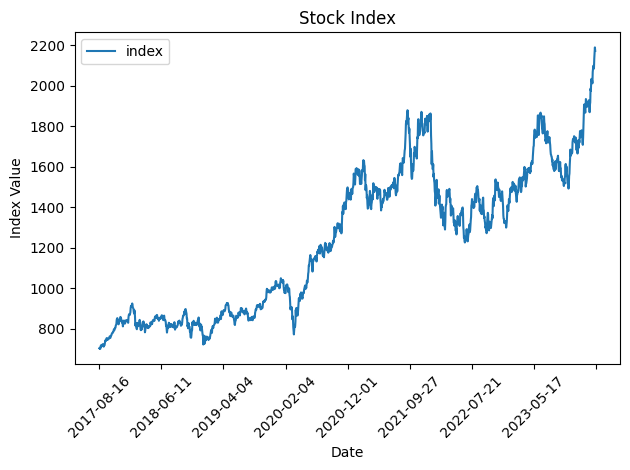

In [107]:
# calculate the market cap weight for each stock
mkt_cap_weight = mkt_cap.groupby('date')['mkt_cap'].transform(lambda x : x / x.sum())

# compose stock index, using weighted sum
weighted_last = last.copy(deep=True)
weighted_last['last'] = mkt_cap_weight * last['last']
stock_index = weighted_last.groupby('date').sum('last').rename(columns={'last': 'index'})

# Set the stock index to 1000 point on 2020-01-06
stock_index_2020_01_06 = stock_index.loc['2020-01-06'].values[0]
stock_index = stock_index / stock_index_2020_01_06 * 1000

# plot
stock_index.plot()
plt.title('Stock Index')
plt.xlabel('Date')
plt.ylabel('Index Value')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## find out the top 5 index move contributor  (both positive and negative) of each day in 2021-01

In [84]:
# calculate the daily return of the stock index
daily_return = stock_index.pct_change().dropna()

sorted_daily_return = daily_return.sort_values(by='index', ascending=False)

top_5_pos_contributors = sorted_daily_return.head(5)
top_5_neg_contributors = sorted_daily_return.tail(5)
top_5_contributors = pd.concat([top_5_pos_contributors, top_5_neg_contributors])

print(top_5_contributors)

               index
date                
2020-03-25  0.069153
2022-11-11  0.068586
2022-03-17  0.051953
2022-10-31  0.051420
2018-11-02  0.049579
2018-02-06 -0.050194
2021-02-26 -0.050683
2022-01-06 -0.051953
2018-12-25 -0.054807
2022-01-11 -0.058940


## plot: for each sector, create a density plot of daily return of all the stocks in that sector in 2022

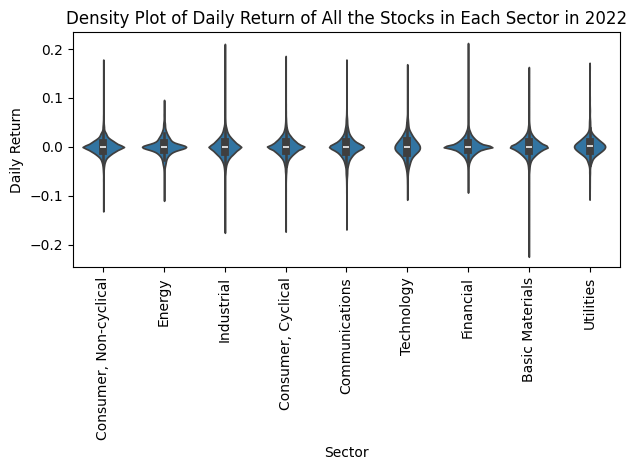

In [118]:
df = last.merge(mkt_cap, on=['ticker', 'date']).merge(sector, on='ticker').merge(volume, on=['ticker', 'date'])

df['return'] = df.groupby('ticker')['last'].pct_change(fill_method=None).dropna()
df['date'] = pd.to_datetime(df['date'])

sns.violinplot(data=df[df['date'].dt.year == 2022], x='bics_sector', y='return')
plt.title('Density Plot of Daily Return of All the Stocks in Each Sector in 2022')
plt.xlabel('Sector')
plt.ylabel('Daily Return')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()